In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
class WaveModel:

    def __init__(self, _modelfile=''):
        '''
        WaveModel.init(_modelfile='') - Initalizes the WaveModel class and loads in a modelfile.
        '''
        self.modelfile = np.loadtxt('/home/tka/source/wenqi/tiAlphaProcessed_wavespeeds.csv',
                        delimiter=',')
        self.planes = self.modelfile[:, 1:3]
        self.modelfile = self.modelfile[:,3:184] * 1000.0

    def compute_gaussian(self, _x, _mean, _width):
        return (1 / np.sqrt(2*np.pi*(_width**2)))*np.exp((-(_x-_mean)**2)/(2*(_width**2)))

test_wm = WaveModel()

In [3]:
import pickle
model = pickle.load(open('/home/tka/source/modelplane.p', 'rb'))
expdata = pickle.load(open('/home/tka/source/expplane.p', 'rb'))

In [4]:
modlist = model.tolist()
modlist = [str('{0:.0f}'.format(x)) for x in modlist]
modelplane = ','.join(modlist)
experimentalplane = expdata.tolist()
experimentalplane = [str('{0:.0f}'.format(x)) for x in experimentalplane]
experimentalplane = ','.join(experimentalplane)
print(experimentalplane)

2746,2760,2775,2789,2803,2817,2832,2846,2860,2875,2889,2903,2918,2932,2946,2960,2975,2989,3003,3018,3032,3033,3034,3035,3036,3037,3038,3039,3040,3041,3041,3042,3043,3044,3045,3046,3047,3048,3049,3050,3051,3052,3053,3054,3055,3056,3057,3058,3059,3060,3061,3062,3062,3063,3064,3065,3066,3067,3068,3069,3070,3069,3068,3067,3066,3065,3064,3063,3062,3062,3061,3060,3059,3058,3057,3056,3055,3054,3053,3052,3051,3050,3049,3048,3047,3046,3045,3044,3043,3042,3041,3041,3040,3039,3038,3037,3036,3035,3034,3033,3032,3033,3034,3035,3036,3037,3038,3039,3040,3041,3041,3042,3043,3044,3045,3046,3047,3048,3049,3050,3051,3035,3019,3002,2986,2970,2954,2938,2921,2905,2889,2873,2857,2840,2824,2808,2792,2775,2759,2743,2727,2728,2729,2730,2731,2732,2733,2734,2734,2735,2736,2737,2738,2739,2740,2741,2742,2743,2744,2745,2746,2746,2746,2746,2746,2746,2746,2746,2746,2746,2746,2746,2746,2746,2746,2746,2746,2746,2746,2746,2746


In [113]:
import os
import time
excmd = '/home/tka/eclipse-workspace/planeoc/Debug/planeoc ' + experimentalplane
#print(excmd)
t1 = time.time()
result = []
# PLANE OverClock....get it? get it?
stream = os.popen(excmd)
result = stream.read()
#print(result)
t2 = time.time()
print("Total Python Execution: {0:.2f}ms".format((t2-t1)*1000))


Total Python Execution: 592.53ms


In [118]:
int(result.strip('\n').split(',')[2])

25

In [81]:
resultf = []
for x in range(0, 180):
    resultf.append(float(result.split(',')[x]))

In [108]:
test_wm.planes[195,:]

array([0.45, 0.3 ])

In [82]:

angle = []
fitness = []
for idx, item in enumerate(result[:-52].split(',')):
    if(idx % 2 == 0):
        angle.append(item)
    else:
        fitness.append(item)
fitness[-1] = fitness[-1].split(',')[0].split('\n')[0]
fitness = [float(i) for i in fitness]
angle = [float(i) for i in angle]
    

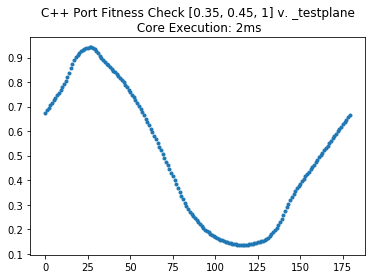

In [85]:
plt.title("C++ Port Fitness Check [0.35, 0.45, 1] v. _testplane\n Core Execution: 2ms")
plt.plot(resultf, '.')

In [107]:
test_wm.planes[195, :]

array([0.45, 0.3 ])

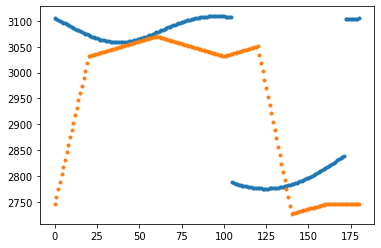

In [260]:
plt.plot(np.roll(model, 0), '.')
plt.plot(expdata, '.')

In [295]:
test_wm.compute_gaussian(expdata[0], model[0], 50)

5.3046370690149146e-14